In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
#PRIMERA CLASE PORCENTAJE DEL TOTAL
primeraclase = df[df["class"] == "First"]
primeraclase.head(3)
totalprimeraclase = (len(primeraclase) / len(df)) * 100
print(f"El porcentaje total de la primera clase en el barco es de: {round(totalprimeraclase)}%")

El porcentaje total de la primera clase en el barco es de: 24%


In [6]:
#SOBREVIVIENTES PORCENTAJE DEL TOTAL
sobrevivientes = df[df["survived"] == 1]
sobrevivientes.head()
totalsobrevivientes = len(sobrevivientes)
print(f"El total de sobrevivientes es: {totalsobrevivientes}")
totalpasajeros = (len(sobrevivientes) / len(df)) * 100
print(f"El porcentaje de pasajeros que sobrevivio al incidente es de: {round(totalpasajeros)}%")

El total de sobrevivientes es: 342
El porcentaje de pasajeros que sobrevivio al incidente es de: 38%


In [33]:
# ESTADISTICA DESCRIPTIVA
media = df["age"].mean()
mediana = df["age"].median()
desviacion = df["age"].std()
print(f"La media es: {round(media)}%, La mediana es: {round(mediana)}%, La desviación estandar es: {desviacion}")
promedioporclase = df.groupby("class", observed=False)["fare"].mean()
print(f"El promedio de pasajeros por cada clase es: {promedioporclase}")

La media es: 30%, La mediana es: 28%, La desviación estandar es: 14.526497332334044
El promedio de pasajeros por cada clase es: class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


In [37]:
nulos = df.isnull().sum()
df['age'] = df['age'].fillna(mediana)
print(nulos)

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


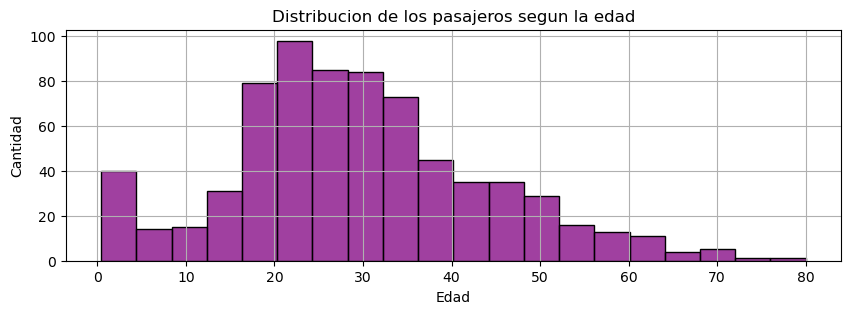

In [8]:
plt.figure(figsize=(10, 3))
sns.histplot(data=df["age"], color='purple')
plt.title('Distribucion de los pasajeros segun la edad')
plt.xlabel("Edad")
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

C:\Users\TB\AppData\Local\Temp\ipykernel_2300\2800173693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="fare", y="class", palette='Set2')


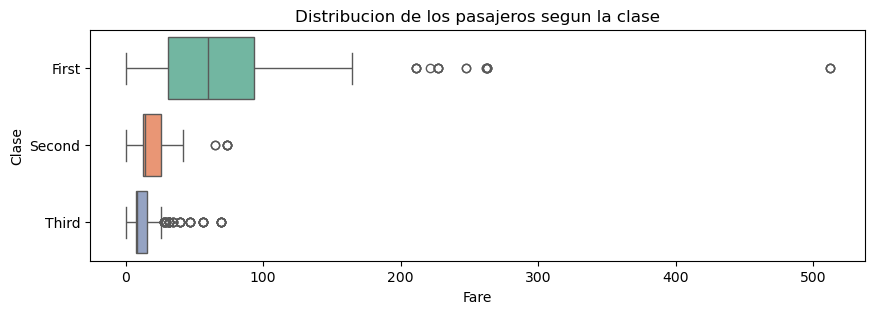

In [21]:
plt.figure(figsize=(10,3))
plt.title('Distribucion de los pasajeros segun la clase')
plt.xlabel("Fare")
plt.ylabel('Clase')
sns.boxplot(data=df, x="fare", y="class", palette='Set2')
plt.show()

C:\Users\TB\AppData\Local\Temp\ipykernel_2300\117367010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_survival, x='family_size', y='survived', palette='Blues_d')


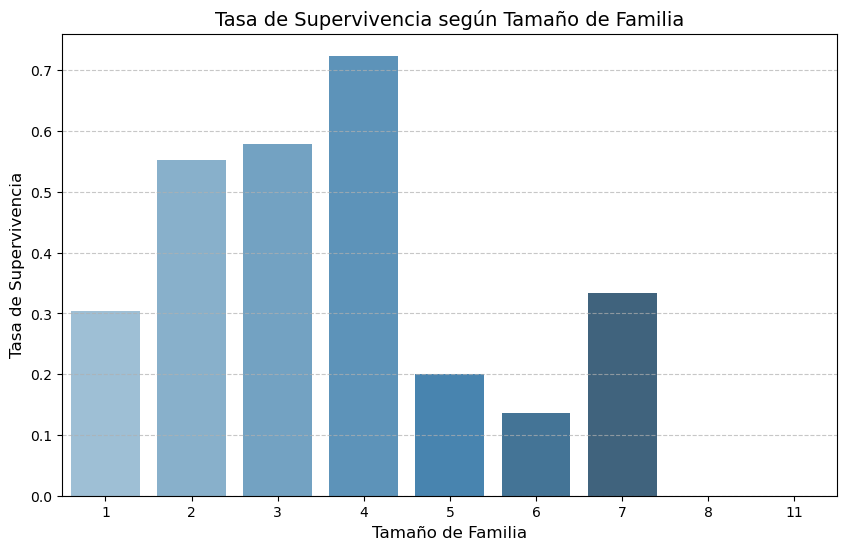

In [40]:
#TAMAÑO DE LA FAMILIA EN LA TASA DE SUPERVIVENCIA
df['family_size'] = df['sibsp'] + df['parch'] + 1
family_survival = df.groupby('family_size')['survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=family_survival, x='family_size', y='survived', palette='Blues_d')
plt.title('Tasa de Supervivencia según Tamaño de Familia', fontsize=14)
plt.xlabel('Tamaño de Familia', fontsize=12)
plt.ylabel('Tasa de Supervivencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [45]:
#PASAJEROS POR SEXO
sexo_pasajeros = df['sex'].value_counts()
print(f"Número de pasajeros por sexo: {sexo_pasajeros}")

Número de pasajeros por sexo: sex
male      577
female    314
Name: count, dtype: int64
